In [40]:
import fasttext
import pandas as pd
import re

from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.stats.inter_rater as irr
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [41]:

model = fasttext.load_model('/home/julita/Desktop/semestr2/NLP/cc.pl.300.bin')

In [42]:
df = pd.read_excel('cyberbullying_train_words_noun.xlsx')
df

,nouns,label1,label2,label3,SUPERanotator,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,LUDZIE,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RESTAURACJA,1.0,1.0,1.0,1.0,NaN,NaN,do 200 wszystkie,NaN,NaN,2. Anotacja według semantyki (znaczenia)\nOsob...,NaN
2,pomoc,2.0,2.0,2.0,2.0,NaN,NaN,od 201 do 300 Iza,NaN,NaN,NaN,NaN
3,świat,3.0,3.0,3.0,3.0,NaN,NaN,później jakoś tam,NaN,NaN,NaN,NaN
4,kurtkę,1.0,1.0,1.0,1.0,NaN,NaN,od 301 do 400 Julita,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
629,inwestor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,wycofał,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,slabo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,dzieci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_for_analysis = df[['nouns', 'SUPERanotator']][:601]
df_for_analysis.columns = ['nouns', 'labels']

In [45]:
df_for_analysis['labels'].unique()

array([0., 1., 2., 3.])

# Kappa-Cohen, Kappa-Fleissa

In [46]:
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa

In [47]:
df_part1 = df[:100].iloc[:,  :-2]
df_part2 = df[101:199].iloc[:,  :-2].reset_index()

In [48]:
kappa_cohen_1_2 = cohen_kappa_score(df_part1['label1'], df_part1['label2'])
kappa_cohen_1_3 = cohen_kappa_score(df_part1['label1'], df_part1['label3'])
kappa_cohen_2_3 = cohen_kappa_score(df_part1['label2'], df_part1['label3'])
mean_part1 = (kappa_cohen_1_2  + kappa_cohen_1_3 + kappa_cohen_2_3 )/3

print("Kappa-Cohen (label1, label2):", kappa_cohen_1_2)
print("Kappa-Cohen (label1, label3):", kappa_cohen_1_3)
print("Kappa-Cohen (label2, label3):", kappa_cohen_2_3)
print("Kappa-Cohen mean part1:", mean_part1)

Kappa-Cohen (label1, label2): 0.8543335761107065
Kappa-Cohen (label1, label3): 0.855595667870036
Kappa-Cohen (label2, label3): 0.9473129610115911
Kappa-Cohen mean part1: 0.8857474016641111


In [50]:
kappa_cohen_1_2_2 = cohen_kappa_score(df_part2['label1'], df_part2['label2'])
kappa_cohen_1_3_2 = cohen_kappa_score(df_part2['label1'], df_part2['label3'])
kappa_cohen_2_3_2 = cohen_kappa_score(df_part2['label2'], df_part2['label3'])
mean_part2 = (kappa_cohen_1_2_2  + kappa_cohen_1_3_2 + kappa_cohen_2_3_2 )/3

print("Kappa-Cohen (label1, label2):", kappa_cohen_1_2_2)
print("Kappa-Cohen (label1, label3):", kappa_cohen_1_3_2)
print("Kappa-Cohen (label2, label3):", kappa_cohen_2_3_2)
print("Kappa-Cohen mean part 2:", mean_part2)

Kappa-Cohen (label1, label2): 0.9459757442116868
Kappa-Cohen (label1, label3): 0.8903803131991052
Kappa-Cohen (label2, label3): 0.8727744807121661
Kappa-Cohen mean part 2: 0.9030435127076527


In [51]:
val_part1 = [kappa_cohen_1_2, kappa_cohen_1_3, kappa_cohen_2_3, mean_part1]
val_part2 = [kappa_cohen_1_2_2, kappa_cohen_1_3_2, kappa_cohen_2_3_2, mean_part2]

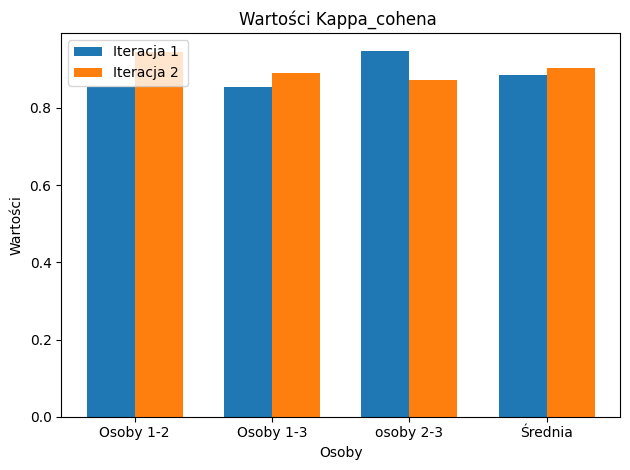

In [52]:
zestawy = ['Osoby 1-2', 'Osoby 1-3', 'osoby 2-3', 'Średnia']
ind = np.arange(len(zestawy))  
szerokość = 0.35  

fig, ax = plt.subplots()

bar1 = ax.bar(ind - szerokość/2, val_part1, szerokość, label='Iteracja 1 ')
bar2 = ax.bar(ind + szerokość/2, val_part2, szerokość, label='Iteracja 2')

ax.set_xlabel('Osoby')
ax.set_ylabel('Wartości')
ax.set_title('Wartości Kappa_cohena ')
ax.set_xticks(ind)
ax.set_xticklabels(zestawy)
ax.legend()

plt.tight_layout()
plt.show()

In [53]:

contingency_matrix1 = np.zeros((len(df_part1), 4), dtype=int)

for i in range(len(df_part1)):
    contingency_matrix1[i, int(df_part1['label1'][i])] += 1  
    contingency_matrix1[i, int(df_part1['label2'][i])] += 1  
    contingency_matrix1[i, int(df_part1['label3'][i])] += 1  

fleiss_kappa1 = irr.fleiss_kappa(contingency_matrix1, method='fleiss')


contingency_matrix2 = np.zeros((len(df_part2), 4), dtype=int)

for i in range(len(df_part2)):
    contingency_matrix2[i, int(df_part2['label1'][i])] += 1  
    contingency_matrix2[i, int(df_part2['label2'][i])] += 1  
    contingency_matrix2[i, int(df_part2['label3'][i])] += 1  

fleiss_kappa2 = irr.fleiss_kappa(contingency_matrix2, method='fleiss')


/tmp/ipykernel_4458/4119753856.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




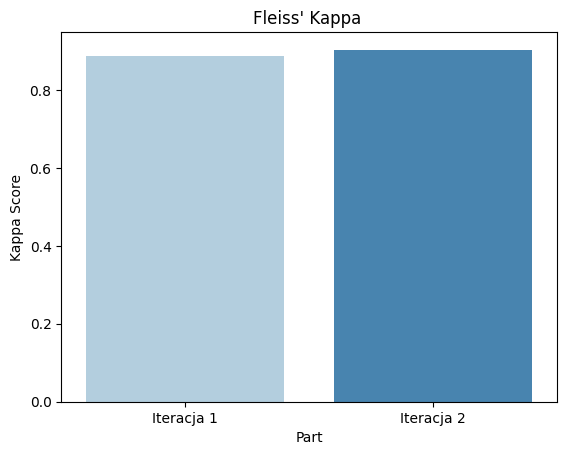

In [54]:
df = pd.DataFrame({
    'Part': ['Iteracja 1', 'Iteracja 2'],
    'Kappa Score': [fleiss_kappa1, fleiss_kappa2]
})

sns.barplot(x='Part', y='Kappa Score', data=df, palette='Blues')

plt.title('Fleiss\' Kappa ')
plt.ylabel('Kappa Score')
plt.show()


# CZĘŚĆ 2

In [55]:
def clean_text(text):
    text = re.sub(r'@anonymized_account', '', text)
    text = re.sub(r'RT', '', text)
    # text = re.sub(r'[^\x00-\x7F]+', '', text)
    # text = re.sub(r'\s+', ' ', text).strip()
    return text

In [56]:
df_for_analysis['nouns'] = df_for_analysis['nouns'].apply(clean_text)
df_for_analysis

,nouns,labels
0,LUDZIE,0.0
1,RESTAURACJA,1.0
2,pomoc,2.0
3,świat,3.0
4,kurtkę,1.0
...,...,...
596,kobietę,0.0
597,Mistrzowie,0.0
598,branża,2.0
599,mirda,2.0


In [57]:
df_for_analysis['embedding'] = df_for_analysis['nouns'].apply(lambda x: model.get_sentence_vector(x))

# FASTTEXT

In [60]:

X = np.array(list(df_for_analysis['embedding']))

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_standardized)

df_tsne = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_tsne['label'] = df_for_analysis['labels']
df_tsne['text'] = df_for_analysis['nouns']

fig = px.scatter(df_tsne, x='x', y='y', color='label', hover_data=['text'], title='TSNE dla FastText dla słów')
fig.show()

In [61]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df_tsne['cluster'] = clusterer.fit_predict(X_embedded)

fig = px.scatter(df_tsne, x='x', y='y', color='cluster', hover_data=['text'], title='HDBSCAN')
fig.show()
